In [7]:
%matplotlib inline  
# To make data visualisations display in Jupyter Notebooks 
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load
import matplotlib.pyplot as plt # Visuvalization & plotting
import seaborn as sns # Also for Data visuvalization 

from sklearn.metrics.pairwise import cosine_similarity  # Compute cosine similarity between samples in X and Y.
from scipy import sparse  #  sparse matrix package for numeric data.
from scipy.sparse.linalg import svds # svd algorithm

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

In [21]:
Rating = pd.read_csv('./data/ratings.csv') 
Movie_D = pd.read_csv('./data/movie_details.csv',encoding='latin-1') ##Movie details 
User_Info = pd.read_csv('./data/user_level_info.csv',encoding='latin-1') ## if you have a unicode string, you can use encode to convert


In [22]:
Rating.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [24]:
Rating.columns = ['user_id', 'movie_id', 'rating', 'timestamp'] 

In [25]:
Movie_D.columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date ',
       'IMDb_URL', 'unknown', 'Action ', 'Adventure', 'Animation',
       'Childrens', 'Comedy ', 'Crime ', ' Documentary ', 'Drama',
       ' Fantasy', 'Film-Noir ', 'Horror ', 'Musical', 'Mystery',
       ' Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [26]:
Movie_Rating = pd.merge(Rating, Movie_D, on ='movie_id')

In [28]:
Movie_Rating.head()

,user_id,movie_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
n_users = Movie_Rating.user_id.unique().shape[0]
n_items = Movie_Rating.movie_id.unique().shape[0]
print(n_items,n_users)


1682 943


In [49]:
Movie_Stats = pd.DataFrame(Movie_Rating.groupby('movie_title')['rating'].mean())
Movie_Stats.sort_values(by = ['rating'],ascending=False).head()


,rating
movie_title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [50]:
Movie_Stats['Count_of_ratings'] = pd.DataFrame(Movie_Rating.groupby('movie_title')['rating'].count())
Movie_Stats.sort_values(by =['Count_of_ratings'], ascending=False).head()


,rating,Count_of_ratings
movie_title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


<AxesSubplot:>

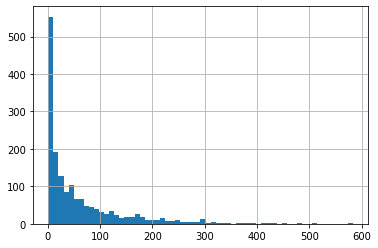

In [58]:
Movie_Stats['Count_of_ratings'].hist(bins=60)


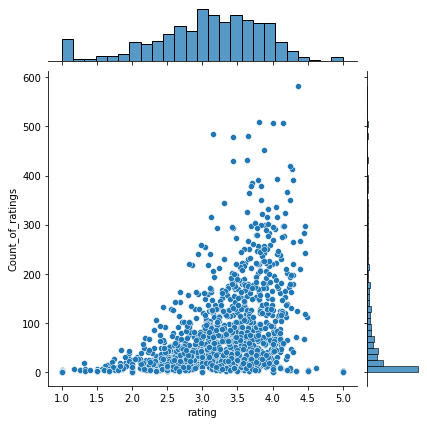

In [69]:
sns.jointplot(x='rating', y='Count_of_ratings', data=Movie_Stats)


In [76]:
User_movie_Rating  = Movie_Rating.pivot_table(index='user_id', columns='movie_title', values='rating')
User_movie_Rating.head()


movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [79]:
User_movie_Rating['Air Force One (1997)']

user_id
1      NaN
2      4.0
3      2.0
4      5.0
5      NaN
      ... 
939    NaN
940    5.0
941    4.0
942    5.0
943    NaN
Name: Air Force One (1997), Length: 943, dtype: float64

In [82]:
Similarity = User_movie_Rating.corrwith(User_movie_Rating['Air Force One (1997)'])
Similarity.head()


movie_title
'Til There Was You (1997)    0.867722
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.221943
12 Angry Men (1957)          0.228031
187 (1997)                   0.294232
dtype: float64

In [91]:
corr_similar = pd.DataFrame(Similarity, columns=['Correlation'])
corr_similar.sort_values(['Correlation'], ascending= False).head()


,Correlation
movie_title,
Love and Death on Long Island (1997),1.0
Losing Chase (1996),1.0
Phat Beach (1996),1.0
My Crazy Life (Mi vida loca) (1993),1.0
Tetsuo II: Body Hammer (1992),1.0


In [93]:
corr_similar_num_of_rating = corr_similar.join(Movie_Stats['Count_of_ratings'])
corr_similar_num_of_rating.sort_values(['Correlation'], ascending= False).head(10)


,Correlation,Count_of_ratings
movie_title,,
Love and Death on Long Island (1997),1.0,2
Losing Chase (1996),1.0,8
Phat Beach (1996),1.0,5
My Crazy Life (Mi vida loca) (1993),1.0,11
Tetsuo II: Body Hammer (1992),1.0,6
Jack and Sarah (1995),1.0,7
Vermin (1998),1.0,2
Faster Pussycat! Kill! Kill! (1965),1.0,7
For Ever Mozart (1996),1.0,3


In [95]:
corr_df = corr_similar_num_of_rating

In [99]:
corr_df[corr_df['Count_of_ratings'] > 50].sort_values('Correlation', ascending=False).head()

,Correlation,Count_of_ratings
movie_title,,
Air Force One (1997),1.000000,431
Black Sheep (1996),0.766259,55
Copycat (1995),0.711744,86
Tales from the Crypt Presents: Bordello of Blood (1996),0.639372,55
Addicted to Love (1997),0.576379,54


In [101]:
def get_recommendations(title):
    Movie_rating = User_movie_Rating[title]

    sim_scores = User_movie_Rating.corrwith(Movie_rating)
    corr_title = pd.DataFrame(sim_scores, columns=['Correlation'])
    
    # Removing na values 
    corr_title.dropna(inplace=True)
    corr_title = corr_title.join(Movie_Stats['Count_of_ratings'])
    
    # Return the top 10 most similar movies
    return corr_title[corr_title ['Count_of_ratings']>50].sort_values('Correlation', ascending=False).head(10)


In [107]:
Movie_cosine = Movie_Rating[['user_id','movie_id','rating']]
Movie_cosine.head()


,user_id,movie_id,rating
0,196,242,3
1,63,242,3
2,226,242,5
3,154,242,3
4,306,242,5


In [108]:
data = Movie_cosine.rating
col = Movie_cosine.movie_id
row = Movie_cosine.user_id

R = sparse.coo_matrix((data, (row, col))).tocsr()


In [112]:
print('{0}x{1} user by movie matrix'.format(*R.shape))

944x1683 user by movie matrix


In [117]:
cosine_similarity

<function sklearn.metrics.pairwise.cosine_similarity(X, Y=None, dense_output=True)>

In [127]:
find_similarities = cosine_similarity(R.T) # We are transposing the matrix 
print (find_similarities.shape)


(1683, 1683)


In [135]:
def Get_Top5_Similarmovies(model, movie_id, n=5):
    return model[movie_id].argsort()[::-1][:n].tolist()  # Here movie id is index


In [140]:
Movie_D.iloc[Get_Top5_Similarmovies(find_similarities, 4)]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4,5,Copycat (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
56,57,Priest (1994),1-Jan-94,NaN,http://us.imdb.com/M/title-exact?Priest%20(1994),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,205,Patton (1970),1-Jan-70,NaN,http://us.imdb.com/M/title-exact?Patton%20(1970),0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
174,175,Brazil (1985),1-Jan-85,NaN,http://us.imdb.com/M/title-exact?Brazil%20(1985),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
202,203,Unforgiven (1992),1-Jan-92,NaN,http://us.imdb.com/M/title-exact?Unforgiven%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [143]:
df_matrix = User_movie_Rating.fillna(0)
df_matrix.values

array([[0., 0., 2., ..., 0., 4., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [148]:
normalized_values = df_matrix.values - np.mean(df_matrix.values, axis=1).reshape(-1,1)
normalized_values.shape


(943, 1664)

In [147]:
type(svds)

function